# Annotation Data

In [1]:
import os
import glob
import shutil
import random
from tqdm.auto import tqdm
import cv2
import matplotlib.pyplot as plt

!pip install -U -q gdown
import gdown

In [2]:
annot_dirpath = '../annot_data'
annot_url = 'https://drive.google.com/uc?id=1xYRNl1CgsVXhrpybY6UPraNocYWczwIS'

In [3]:
# Downloading the data
if not os.path.exists(annot_dirpath):
    os.makedirs(annot_dirpath)
    
gdown.download(url=annot_url, output=os.path.join(annot_dirpath, 'annotation.zip'))

Downloading...
From (uriginal): https://drive.google.com/uc?id=1xYRNl1CgsVXhrpybY6UPraNocYWczwIS
From (redirected): https://drive.google.com/uc?id=1xYRNl1CgsVXhrpybY6UPraNocYWczwIS&confirm=t&uuid=f8f00924-f4be-45a4-b2e7-b0897bd956c8
To: /notebooks/annot_data/annotation.zip
100%|██████████| 1.99G/1.99G [00:54<00:00, 36.3MB/s]


'../annot_data/annotation.zip'

In [ ]:
# Extracting the data
annot_filepath = '../annot_data/annotation.zip'
shutil.unpack_archive(annot_filepath, os.path.join(annot_dirpath, 'zip_data'))
print('[INFO] Data is been extracted.')

In [20]:
# Extracting all the images and annotation of the dataset
zip_dirpath = '../annot_data/zip_data'
zip_data_list = glob.glob(zip_dirpath + '/*')

mall_dataset_path = '../annot_data/mall_dataset'
caviar_dataset_path = '../annot_data/caviar_dataset'
for path in tqdm(zip_data_list):
    if path.endswith('mall_dataset_annot.zip'):
        shutil.unpack_archive(path, mall_dataset_path)
    else:
        shutil.unpack_archive(path, os.path.join(caviar_dataset_path, path.split('/')[-1].replace('.zip', '')))
print('[INFO] All the dataset is been extracted.')

  0%|          | 0/17 [00:00<?, ?it/s]

[INFO] All the dataset is been extracted.


In [45]:
# Seperating the images and labels for mall dataset
mall_img_list = glob.glob('../annot_data/mall_dataset/obj_train_data/*.jpg')
mall_label_list = glob.glob('../annot_data/mall_dataset/obj_train_data/*.txt')

# Copying the files in a different directory
mall_img_dir = os.path.join(mall_dataset_path, 'images')

if not os.path.exists(mall_img_dir):
    os.makedirs(mall_img_dir)
    
for path in tqdm(mall_img_list):
    if os.path.isfile(path):
        shutil.copy2(path, os.path.join(mall_img_dir, path.split('/')[-1]))

print('[INFO] All the Image files of Mall Dataset are Copied')
                     
mall_label_dir = os.path.join(mall_dataset_path, 'labels')

if not os.path.exists(mall_label_dir):
    os.makedirs(mall_label_dir)

for path in tqdm(mall_label_list):
    if os.path.isfile(path):
        shutil.copy2(path, os.path.join(mall_label_dir, path.split('/')[-1]))

print('[INFO] All the Label files of Mall Dataset are Copied')

  0%|          | 0/141 [00:00<?, ?it/s]

[INFO] All the Image files of Mall Dataset are Copied


  0%|          | 0/141 [00:00<?, ?it/s]

[INFO] All the Label files of Mall Dataset are Copied


In [7]:
# Seperating the images and labels for caviar dataset
caviar_img_list = glob.glob('../annot_data/caviar_dataset/*/obj_train_data/*.PNG')
caviar_label_list = glob.glob('../annot_data/caviar_dataset/*/obj_train_data/*.txt')

# Copying the files in a different directory
caviar_img_dir = os.path.join(caviar_dataset_path, 'images')

if not os.path.exists(caviar_img_dir):
    os.makedirs(caviar_img_dir)
    
for path in tqdm(caviar_img_list):
    if os.path.isfile(path):
        shutil.copy2(path, os.path.join(caviar_img_dir, f"{path.split('/')[-3]}_{path.split('/')[-1]}"))

print('[INFO] All the Image files of Caviar Dataset are Copied')
                     
caviar_label_dir = os.path.join(caviar_dataset_path, 'labels')

if not os.path.exists(caviar_label_dir):
    os.makedirs(caviar_label_dir)

for path in tqdm(caviar_label_list):
    if os.path.isfile(path):
        shutil.copy2(path, os.path.join(caviar_label_dir, f"{path.split('/')[-3]}_{path.split('/')[-1]}"))

print('[INFO] All the Label files of Caviar Dataset are Copied')

  0%|          | 0/10690 [00:00<?, ?it/s]

[INFO] All the Image files of Caviar Dataset are Copied


  0%|          | 0/10690 [00:00<?, ?it/s]

[INFO] All the Label files of Caviar Dataset are Copied


## Yolo Dataset Directory for Model Pipeline

In [6]:
# Creating images and labels directory for model training
train_img_dataset_dir = '../datasets/images/train'
val_img_dataset_dir = '../datasets/images/val'
train_label_dataset_dir = '../datasets/labels/train'
val_label_dataset_dir = '../datasets/labels/val'

if not os.path.exists(train_img_dataset_dir):
    os.makedirs(train_img_dataset_dir)
    
if not os.path.exists(val_img_dataset_dir):
    os.makedirs(val_img_dataset_dir)

if not os.path.exists(train_label_dataset_dir):
    os.makedirs(train_label_dataset_dir)
    
if not os.path.exists(val_label_dataset_dir):
    os.makedirs(val_label_dataset_dir)

In [16]:
# Getting the list of images and labels in mall dataset
mall_dataset_img_list = glob.glob('../annot_data/mall_dataset/images/*')
mall_dataset_label_list = glob.glob('../annot_data/mall_dataset/labels/*')
mall_train_split = int(len(mall_dataset_img_list) * 0.8)

random.seed(42)
mall_train_sample = random.sample(mall_dataset_img_list, mall_train_split)

In [21]:
# Moving the mall dataset train samples for both images and labels
for path in tqdm(mall_train_sample):
    if os.path.isfile(path):
        shutil.move(path, train_img_dataset_dir)
        shutil.move(path.replace('images', 'labels').replace('.jpg', '.txt'), train_label_dataset_dir)
print('[INFO] All the Training Samples of Mall Dataset is been moved to the datasets directory.')

# Moving the remaining data as a validation sample
for path in tqdm(mall_dataset_img_list):
    if os.path.isfile(path):
        shutil.move(path, val_img_dataset_dir)
        shutil.move(path.replace('images', 'labels').replace('.jpg', '.txt'), val_label_dataset_dir)
print('[INFO] All the Validation Samples of Mall Dataset is been moved to the datasets directory.')

  0%|          | 0/112 [00:00<?, ?it/s]

[INFO] All the Training Samples of Mall Dataset is been moved to the datasets directory.


  0%|          | 0/141 [00:00<?, ?it/s]

[INFO] All the Validation Samples of Mall Dataset is been moved to the datasets directory.


In [22]:
# Getting the list of images and labels in caviar dataset
caviar_dataset_img_list = glob.glob('../annot_data/caviar_dataset/images/*')
caviar_dataset_label_list = glob.glob('../annot_data/caviar_dataset/labels/*')
caviar_train_split = int(len(caviar_dataset_img_list) * 0.8)

random.seed(42)
caviar_train_sample = random.sample(caviar_dataset_img_list, caviar_train_split)

In [27]:
# Moving the caviar dataset train samples for both images and labels
for path in tqdm(caviar_train_sample):
    if os.path.isfile(path):
        shutil.move(path, train_img_dataset_dir)
        shutil.move(path.replace('images', 'labels').replace('.PNG', '.txt'), train_label_dataset_dir)
print('[INFO] All the Training Samples of Caviar Dataset is been moved to the datasets directory.')

# Moving the remaining data as a validation sample
for path in tqdm(caviar_dataset_img_list):
    if os.path.isfile(path):
        shutil.move(path, val_img_dataset_dir)
        shutil.move(path.replace('images', 'labels').replace('.PNG', '.txt'), val_label_dataset_dir)
print('[INFO] All the Validation Samples of Caviar Dataset is been moved to the datasets directory.')

  0%|          | 0/8552 [00:00<?, ?it/s]

[INFO] All the Training Samples of Caviar Dataset is been moved to the datasets directory.


  0%|          | 0/10690 [00:00<?, ?it/s]

[INFO] All the Validation Samples of Caviar Dataset is been moved to the datasets directory.


In [3]:
# Walk through of the Model training dataset
for dirpath, dirnames, filenames in os.walk('../datasets'):
    print(f'There are {len(dirnames)} directories and {len(filenames)} files in "{dirpath}".')

There are 2 directories and 0 files in "../datasets".
There are 2 directories and 0 files in "../datasets/labels".
There are 0 directories and 8664 files in "../datasets/labels/train".
There are 0 directories and 2167 files in "../datasets/labels/val".
There are 2 directories and 0 files in "../datasets/images".
There are 0 directories and 8664 files in "../datasets/images/train".
There are 0 directories and 2167 files in "../datasets/images/val".


In [4]:
# Creating a function to visualize model training dataset
def plot_bboxes(img_file: str, annot_file: str, class_dict: dict):
    """
    A function to plot the bounding boxes amd their object classes onto the image.
    
    Parameters:
        img_file: str, A string containing the path to the image file.
        annot_file: str, A string containing the path to the annotation file in yolo format.
        class_dict: dict, A dict containing the classes in the similar sequence as per the annot_file.
    """
    # Reading the image and annot file
    image = cv2.imread(img_file)
    img_h, img_w, _ = image.shape
    
    with open(annot_file, 'r') as f:
        data = f.read().split('\n')
        data = [i.split(' ') for i in data][:-1]
        data = [[float(j) for j in i] for i in data]
    
    # Calculating the bbox in Pascal VOC format
    for bbox in data:
        class_idx, x_center, y_center, width, height = bbox
        xmin = int((x_center - width / 2) * img_w)
        ymin = int((y_center - height / 2) * img_h)
        xmax = int((x_center + width / 2) * img_w)
        ymax = int((y_center + height / 2) * img_h)
        
        # Correcting bbox if out of image size
        if xmin < 0:
            xmin = 0
        if ymin < 0:
            ymin = 0
        if xmax > img_w - 1:
            xmax = img_w - 1
        if ymax > img_h - 1:
            ymax = img_h - 1
        
        # Creating the box and label for the image
        cv2.rectangle(image, (xmin, ymin), (xmax, ymax), (255, 255, 0), 2)
        cv2.putText(image, class_dict[int(class_idx)], (xmin, 0 if ymin-15 < 0 else ymin-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 255, 0), 2)
    
    # Displaying the image
    plt.imshow(image)
    plt.axis(False)

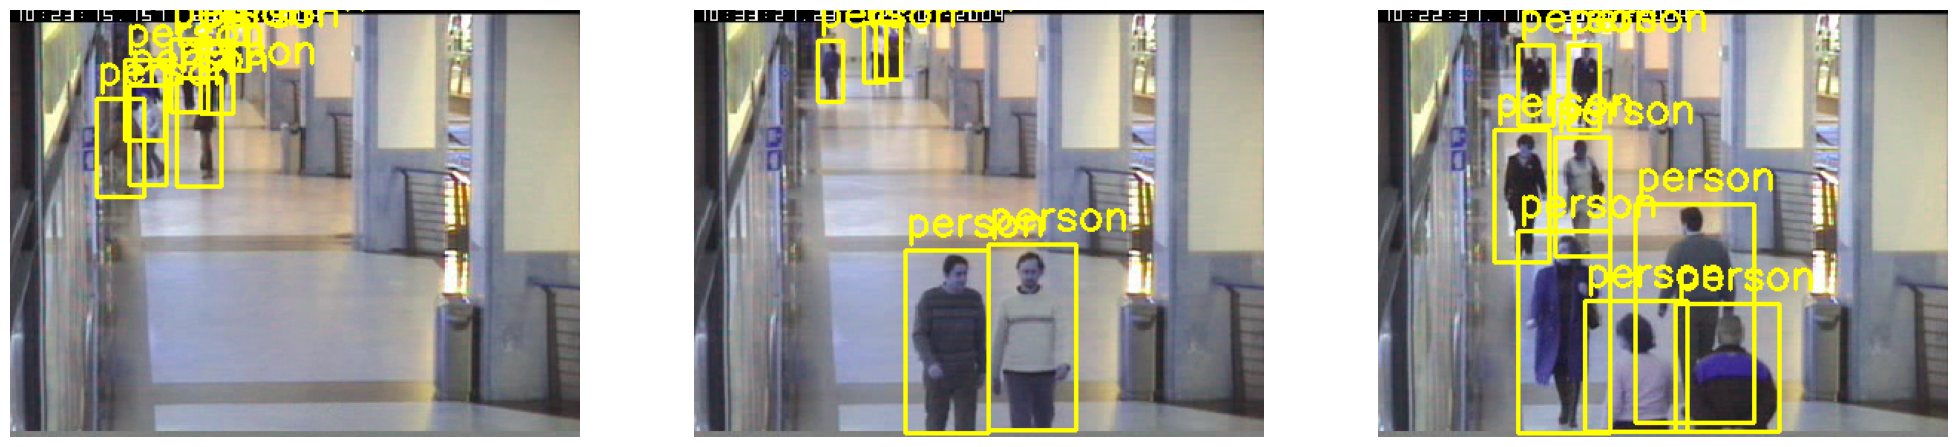

In [12]:
# Visualizing dataset images and labels
dataset_images_path = '../datasets/images'
dataset_images_list = glob.glob(dataset_images_path + '/*/*')

plt.figure(figsize=(25, 8))
rand_int = random.sample(range(len(dataset_images_list)), 3)
for i in range(3):
    plt.subplot(1, 3, i+1)
    plot_bboxes(dataset_images_list[rand_int[i]], 
                dataset_images_list[rand_int[i]].replace('images', 'labels')[:-3]+'txt', 
                ['person'])